In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [4]:
X = digits.data

In [5]:
y = digits.target

### Data Visualization

In [6]:
img = X[0:1,:]

In [7]:
img = img.reshape((8,8))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

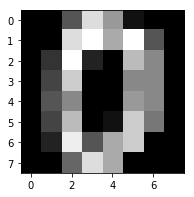

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(img,cmap='gray')

# PCA

In [10]:
# normalization
X_norm = X/X.max()

from statsmodels.multivariate.pca import PCA
# princple component analysis

In [11]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(0.5)

In [18]:
x_pca = pca.fit_transform(X_norm)

In [19]:
pca.n_components_

5

In [20]:
x_pca.shape

(1797, 5)

In [59]:
var_per = pca.explained_variance_ratio_

In [67]:
cum = [0]
for i in range(len(var_per)):
    cum.append(cum[-1]+var_per[i])

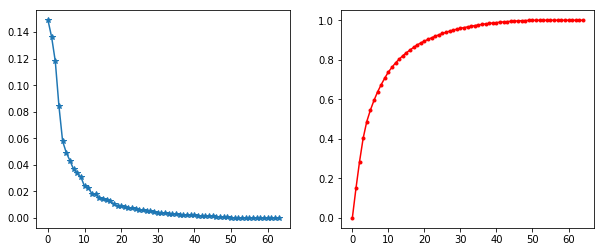

In [72]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(var_per,'*-')
plt.subplot(1,2,2)
plt.plot(cum,'r.-')
plt.show()

In [73]:
X_pca_train = x_pca[:,0:17]

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()
model.fit(X_pca_train,y)

C:\Users\Srikanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Srikanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
y_pred = model.predict(X_pca_train)

In [78]:
from pandas_ml import ConfusionMatrix

In [79]:
cm = ConfusionMatrix(y,y_pred)

In [80]:
print(cm)

Predicted    0    1    2    3    4    5    6    7    8    9  __all__
Actual                                                              
0          177    0    0    0    1    0    0    0    0    0      178
1            0  172    1    1    0    1    1    0    4    2      182
2            0    0  177    0    0    0    0    0    0    0      177
3            0    2    1  170    0    2    0    4    3    1      183
4            0    0    0    0  175    0    0    3    3    0      181
5            1    2    0    0    0  174    1    0    0    4      182
6            0    4    0    0    1    0  175    0    1    0      181
7            0    0    0    0    1    0    0  176    1    1      179
8            0   11    1    2    0    3    1    1  153    2      174
9            0    2    0    1    1    3    0    0    3  170      180
__all__    178  193  180  174  179  183  178  184  168  180     1797


In [82]:
model.predict_proba(X_pca_train).shape

(1797, 10)